<a href="https://colab.research.google.com/github/lathiyadhruvraj/Deep-Learning/blob/main/FASHION_MNIST%20(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [7]:
# Fashion MNIST
# 28 x 28 grayscale images of different types of clothing

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
y_test.shape

(10000,)

The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

0 : T-shirt/top <br>
1 : Trouser <br>
2 : Pullover <br>
3 : Dress <br>
4 : Coat <br>
5 : Sandal <br>
6 : Shirt <br>
7 : Sneaker <br>
8 : Bag <br>
9 : Ankle boot

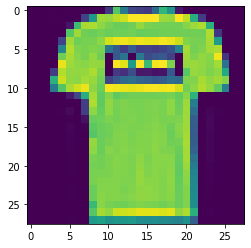

In [12]:
plt.imshow(x_train[1])
#it will show heatmap

no : 59137 ,category : 1


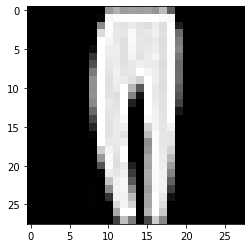

no : 11953 ,category : 3


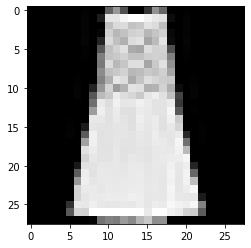

no : 9791 ,category : 8


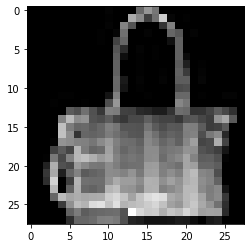

no : 2782 ,category : 8


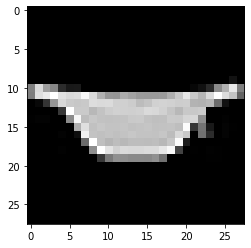

no : 15931 ,category : 4


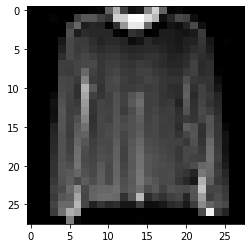

In [13]:
# train data

for i in np.random.randint(60000,size=5):
  print("no :",i, ",category :", y_train[i])
  plt.imshow(x_train[i], cmap='gray')
  plt.show()


no : 9593 ,category : 1


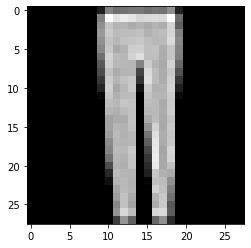

no : 3966 ,category : 6


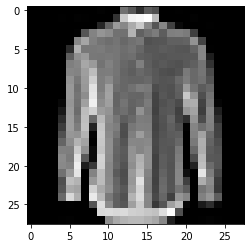

no : 8721 ,category : 3


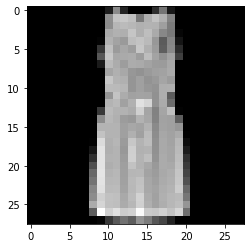

no : 9061 ,category : 0


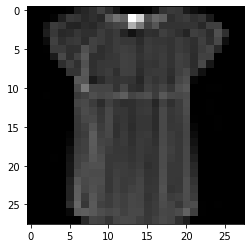

no : 730 ,category : 9


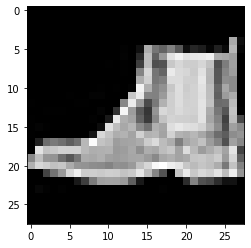

In [14]:
# test data

for i in np.random.randint(10000,size=5):
  print("no :",i, ",category :", y_test[i])
  plt.imshow(x_test[i], cmap='gray')
  plt.show()

In [15]:
# SCALING

x_train, x_test = x_train/255.0, x_test/255.0

x_train.shape

(60000, 28, 28)

In [16]:
# Conv2D WANTS 4D WE HAVE 3D so we will ADD one dim

# we have --> N x H x W
# convert --> N x H x W x 1

In [17]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [18]:
x_train.shape

(60000, 28, 28, 1)

In [19]:
x_test.shape

(10000, 28, 28, 1)

In [20]:
# Number of classes
print(set(y_train))
K = len(set(y_train))
K

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


10

In [21]:
x_train[0].shape

(28, 28, 1)

In [29]:
# Build the model

i = Input(shape = x_train[0].shape)
x = Conv2D(32, (4,4), strides=2, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(i) #32, 64, 128 are features
x = Conv2D(64, (4,4), strides=2, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(x)
x = Conv2D(128, (4,4), strides=2, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(x)
x = Flatten()(x) # flatten works as we have sqaure images
x = Dropout(0.5)(x)
x = Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(x)
x = Dropout(0.3)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)


In [30]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7846 - accuracy: 0.7076 - val_loss: 0.4298 - val_accuracy: 0.8430
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4363 - accuracy: 0.8383 - val_loss: 0.4226 - val_accuracy: 0.8461
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3922 - accuracy: 0.8552 - val_loss: 0.3751 - val_accuracy: 0.8625
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3585 - accuracy: 0.8687 - val_loss: 0.3769 - val_accuracy: 0.8645
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3472 - accuracy: 0.8707 - val_loss: 0.3661 - val_accuracy: 0.8675
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3272 - accuracy: 0.8788 - val_loss: 0.3707 - val_accuracy: 0.8691
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3120 - accuracy: 0.8842 - val_loss: 0.3387 - val_accuracy:

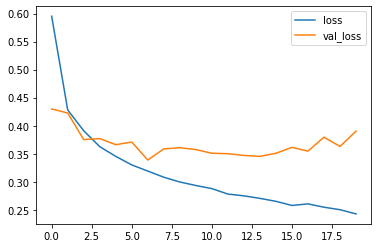

In [32]:
#Plot loss per iteration

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [26]:
#observe : loss(train_data) is going down but 
#    val_loss going up after 10 epochs which says model is OVERFITTING

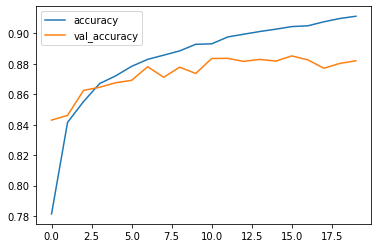

In [33]:
#Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [28]:
#observation: val_accuracy is mostly steady AND
#      val_loss going up which says 
# MODEL IS BECOMING CONFIDENT IN MAKING INCORRECT PREDICTIONS.

In [28]:
#I HAVE TRIED SO MANY VALUES STILL IT ALWAYS OVERFITS A LITTLE, AGAIN ITS HYPERPARAMETER TUNING 